In [66]:
import os
import csv
import matplotlib.pyplot as plt
import math

In [67]:
def calc_first_order(a, g, x) :
    return list(g/a*(1- math.exp(-1*a*t)) for t in x)

def calc_second_order(a, g, x) :
    return list(math.sqrt(g/a)*math.tanh(math.sqrt(a*g)*t) for t in x)

In [68]:
def load_files(dir_name, variance=None, value=None) :
    times_list = []
    vys_list = []
    density_list = []

    files = os.listdir(dir_name)

    if variance and value :
        if variance == "MR" :
            files = list(filter( lambda x : float(x.split('_')[6])==float(value), files))
        elif variance == "T" :
            files = list(filter( lambda x : float(x.split('_')[4])==float(value), files))
        elif variance == "RR" :
            files = list(filter( lambda x : float(x.split('_')[5])==float(value), files))

    for file_name in files :
        with open(dir_name+'/'+file_name) as csvfile:
            times = []
            vys = []
            density = []
            spamreader = csv.reader(csvfile, delimiter=';')
            for i, row in enumerate(spamreader):
                if i > 0 and len(row) == 3:
                    try :
                        temp_t, temp_vy, temp_density = list(map(lambda x : float(x), row))
                        times.append(temp_t)
                        vys.append(temp_vy)
                        density.append(temp_density)
                    except :
                        print ("error", i, row)
                        break
            times_list.append(times)
            vys_list.append(vys)
            density_list.append(density)
    
    return times_list, vys_list, density_list

In [69]:
times_list, vys_list, density_list = load_files('result_T', 'T', 2000)

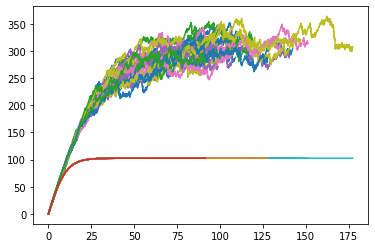

In [70]:
for times, vys in zip(times_list, vys_list) :
    plt.plot(times, vys)
#     plt.plot(times, calc_first_order(0.085, 10, times))
    plt.plot(times, calc_second_order(0.00095, 10, times)) 

In [71]:
# How to determining terminal velocity
terminal_vs = []
for times, vys in zip (times_list, vys_list) :
    if len(vys) > 0 :
        terminal_vs.append(sum(vys[-1000:])/1000)
terminal_v = sum(terminal_vs)/len(terminal_vs)
print("terminal velocity is {}".format(terminal_v) )

terminal velocity is 302.7020715717042


In [72]:
# How to set the determining 
def get_gamma_by_first_order(g, terminal_v) :
    return g/terminal_v

def get_gamma_by_second_order(g, terminal_v) :
    return g/(terminal_v**2)

In [73]:
g = 10
gamma_1 = get_gamma_by_first_order(g, terminal_v)
gamma_2 = get_gamma_by_second_order(g, terminal_v)
print("damping factor gamma in the first order situation : {}".format(gamma_1))
print("damping factor gamma in the second order situation : {}".format(gamma_2))

damping factor gamma in the first order situation : 0.03303578316487073
damping factor gamma in the second order situation : 0.00010913629693163562


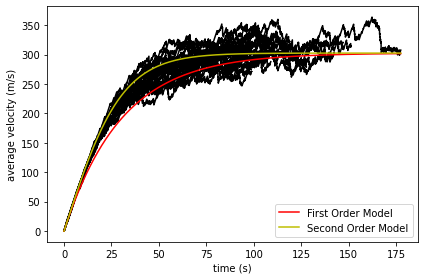

In [74]:
longest_times = []
for times, vys in zip(times_list, vys_list) :
    plt.plot(times, vys, 'k')
    if len(longest_times) < len(times) :
        longest_times = times
plt.plot(longest_times, calc_first_order(gamma_1, g, longest_times), 'r-', label='First Order Model')
plt.plot(longest_times, calc_second_order(gamma_2, g, longest_times), 'y-', label='Second Order Model')
plt.legend()
plt.xlabel("time (s)")
plt.ylabel("average velocity (m/s)")
plt.tight_layout()
plt.savefig("curvefittingcompare.jpg")

In [75]:
import numpy as np
sqrt_error_first_order = 0.0
sqrt_error_second_order = 0.0
for times, vys in zip(times_list, vys_list) :    
    if len(times) > 0 :
        sqrt_error_first_order += np.sqrt(sum((np.array(vys) - np.array(calc_first_order(gamma_1, g, times)))**2)/len(times))
        sqrt_error_second_order += np.sqrt(sum((np.array(vys) - np.array(calc_second_order(gamma_2, g, times)))**2)/len(times)) 
    
print("The Mean Square Root Error of First Order Model : {}".format(sqrt_error_first_order/len(vys_list)))
print("The Mean Square Root Error of Second Order Model : {}".format(sqrt_error_second_order/len(vys_list)))
if sqrt_error_first_order < sqrt_error_second_order :
    print("The first order model is more fitter than the second order model")
else :
    print("The second order model is more fitter than the first order model")

The Mean Square Root Error of First Order Model : 23.586043634980026
The Mean Square Root Error of Second Order Model : 17.98255467087641
The second order model is more fitter than the first order model


# Organized Script

In [76]:
def calc_first_order(a, g, x) :
    return list(g/a*(1- math.exp(-1*a*t)) for t in x)

def calc_second_order(a, g, x) :
    return list(math.sqrt(g/a)*math.tanh(math.sqrt(a*g)*t) for t in x)

def load_files(dir_name, variance=None, value=None) :
    times_list = []
    vys_list = []
    density_list = []

    files = os.listdir(dir_name)

    if variance and value :
        if variance == "MR" :
            files = list(filter( lambda x : float(x.split('_')[6])==float(value), files))
        elif variance == "T" :
            files = list(filter( lambda x : float(x.split('_')[4])==float(value), files))
        elif variance == "RR" :
            files = list(filter( lambda x : float(x.split('_')[5])==float(value), files))
        elif variance == "RRR" :
            files = list(filter( lambda x : float(x.split('_')[5])==float(value), files))
        elif variance == "D" :
            files = list(filter( lambda x : float(float(x.split('_')[1])/(float(x.split('_')[2])*(float(x.split('_')[3]))))==float(value), files))

    for file_name in files :
        with open(dir_name+'/'+file_name) as csvfile:
            times = []
            vys = []
            density = []
            spamreader = csv.reader(csvfile, delimiter=';')
            for i, row in enumerate(spamreader):
                if i > 0 and len(row) == 3:
                    try :
                        temp_t, temp_vy, temp_density = list(map(lambda x : float(x), row))
                        times.append(temp_t)
                        vys.append(temp_vy)
                        density.append(temp_density)
                    except :
                        print ("error", i, row)
            times_list.append(times)
            vys_list.append(vys)
            density_list.append(density)
    
    return times_list, vys_list, density_list

# How to set the determining 
def get_gamma_by_first_order(g, terminal_v) :
    return g/terminal_v

def get_gamma_by_second_order(g, terminal_v) :
    return g/(terminal_v**2)

In [77]:
def compare_models(dir_name, variable, value) :

    times_list, vys_list, density_list = load_files(dir_name, variable, value)
    
    terminal_vs = []
    for times, vys in zip (times_list, vys_list) :
        if len(vys) > 0 :
            terminal_vs.append(sum(vys[-1000:])/1000)
    if len(terminal_vs) > 0 :
        terminal_v = sum(terminal_vs)/len(terminal_vs)

        g = 10
        gamma_1 = get_gamma_by_first_order(g, terminal_v)
        gamma_2 = get_gamma_by_second_order(g, terminal_v)
        print("damping factor gamma in the first order situation : {}".format(gamma_1))
        print("damping factor gamma in the second order situation : {}".format(gamma_2))

        sqrt_error_first_order = 0.0
        sqrt_error_second_order = 0.0
        for times, vys in zip(times_list, vys_list) :    
            if (len(times) > 0 ) :
                sqrt_error_first_order += np.sqrt(sum((np.array(vys) - np.array(calc_first_order(gamma_1, g, times)))**2)/len(times))
                sqrt_error_second_order += np.sqrt(sum((np.array(vys) - np.array(calc_second_order(gamma_2, g, times)))**2)/len(times)) 

        print("The Mean Square Root Error of First Order Model : {}".format(sqrt_error_first_order/len(vys_list)))
        print("The Mean Square Root Error of Second Order Model : {}".format(sqrt_error_second_order/len(vys_list)))
        if sqrt_error_first_order < sqrt_error_second_order :
            print("The first order model is more fitter than the second order model")
        else :
            print("The second order model is more fitter than the first order model")

        return [gamma_1, gamma_2, terminal_v]
    else :
        return [None, None, None]

## Temperature

In [93]:
gamma1s = [] 
gamma2s = []
terminal_vs = []

Ts = list(map(lambda x : x*100,  range( 1, 100)))
for T in Ts :
    print(T)
    [g1, g2, terminal_v] = compare_models('result_T', 'T', T)
    print(g1)
    print(g2)
    gamma1s.append(g1)
    gamma2s.append(g2)
    terminal_vs.append(terminal_v)

# plt.plot(Ts, gamma1s, label='First Order Model')
# plt.plot(Ts, gamma2s, label='Second Order Model')
# plt.legend()
# plt.xlabel("damping coefficient")
# plt.ylabel("temperature (K)")
# plt.savefig("damping coefficient_Temperature.jpg")


100
damping factor gamma in the first order situation : 0.032353462123724516
damping factor gamma in the second order situation : 0.00010467465113912769
The Mean Square Root Error of First Order Model : 27.077150104016976
The Mean Square Root Error of Second Order Model : 16.31879844559044
The second order model is more fitter than the first order model
0.032353462123724516
0.00010467465113912769
200
damping factor gamma in the first order situation : 0.032499503833906186
damping factor gamma in the second order situation : 0.00010562177494500828
The Mean Square Root Error of First Order Model : 26.54310292841513
The Mean Square Root Error of Second Order Model : 14.861091259395087
The second order model is more fitter than the first order model
0.032499503833906186
0.00010562177494500828
300
damping factor gamma in the first order situation : 0.032639202796901266
damping factor gamma in the second order situation : 0.00010653175592172475
The Mean Square Root Error of First Order Model

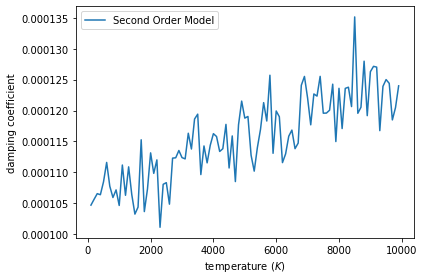

In [94]:
plt.plot(Ts, gamma2s, label='Second Order Model')
plt.legend()
plt.xlabel(r'temperature $(K)$')
plt.ylabel("damping coefficient")
plt.tight_layout()
plt.savefig("damping coefficient_temperature.jpg")

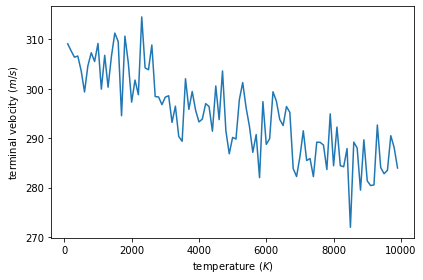

In [95]:
# plt.plot(Ts, gamma1s, label='First Order Model')
plt.plot(Ts, terminal_vs)
# plt.legend()
plt.xlabel(r'temperature $(K)$')
plt.ylabel(r'terminal velocity $(m/s)$')
plt.tight_layout()
plt.savefig("terminal_velocity_temperature.jpg")


## Radius Ratio

In [90]:
gamma1s = [] 
gamma2s = []
terminal_vs = []

RRs = list(map(lambda x : x,  range( 4, 100)))
for RR in RRs :
    print(RR)
    [g1, g2, terminal_v] = compare_models('result_RR', 'RR', RR)
    print(g1)
    print(g2)
    gamma1s.append(g1)
    gamma2s.append(g2)
    terminal_vs.append(terminal_v)

# plt.plot(RRs, gamma1s, label='First Order Model')
# plt.plot(RRs, gamma2s, label='Second Order Model')
# plt.legend()
# plt.ylabel("damping coefficient")
# plt.xlabel("Radius Ratio")

4
damping factor gamma in the first order situation : 0.013266731078831364
damping factor gamma in the second order situation : 1.7600615351802998e-05
The Mean Square Root Error of First Order Model : 53.59512986241757
The Mean Square Root Error of Second Order Model : 59.63066776927971
The first order model is more fitter than the second order model
0.013266731078831364
1.7600615351802998e-05
5
damping factor gamma in the first order situation : 0.019231696850455334
damping factor gamma in the second order situation : 3.6985816374781353e-05
The Mean Square Root Error of First Order Model : 54.829586023772144
The Mean Square Root Error of Second Order Model : 24.187999740850742
The second order model is more fitter than the first order model
0.019231696850455334
3.6985816374781353e-05
6
damping factor gamma in the first order situation : 0.020296827360286523
damping factor gamma in the second order situation : 4.119612008932756e-05
The Mean Square Root Error of First Order Model : 43.1

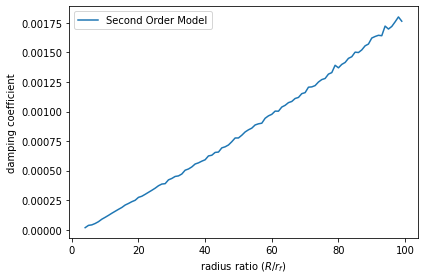

In [91]:
# plt.plot(Ts, gamma1s, label='First Order Model')
plt.plot(RRs, gamma2s, label='Second Order Model')
plt.legend()
plt.ylabel("damping coefficient")
plt.xlabel(r'radius ratio $(R/r_f)$')
plt.tight_layout()
plt.savefig("damping coefficient_radius.jpg")

No handles with labels found to put in legend.


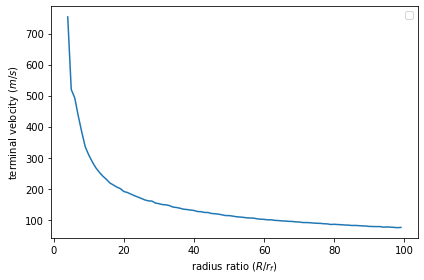

In [92]:
# plt.plot(Ts, gamma1s, label='First Order Model')
plt.plot(RRs, terminal_vs)
plt.legend()
plt.ylabel(r'terminal velocity $(m/s)$')
plt.xlabel(r'radius ratio $(R/r_f)$')
plt.tight_layout()
plt.savefig("terminal_velocity_radius.jpg")

## Reverse Radius

In [96]:
gamma1s = [] 
gamma2s = []
terminal_vs = []

RRRs = list(map(lambda x : x,  range( 4, 100)))
for RRR in RRRs :
    print(RRR)
    [g1, g2, terminal_v] = compare_models('result_RRR', 'RRR', RRR)
    print(g1)
    print(g2)
    gamma1s.append(g1)
    gamma2s.append(g2)
    terminal_vs.append(terminal_v)

# plt.plot(RRs, gamma1s, label='First Order Model')
# plt.plot(RRs, gamma2s, label='Second Order Model')
# plt.legend()
# plt.ylabel("damping coefficient")
# plt.xlabel("Radius Ratio")

4
damping factor gamma in the first order situation : 0.03288475458792393
damping factor gamma in the second order situation : 0.00010814070843079839
The Mean Square Root Error of First Order Model : 11.007288027702254
The Mean Square Root Error of Second Order Model : 6.459757968106869
The second order model is more fitter than the first order model
0.03288475458792393
0.00010814070843079839
5
damping factor gamma in the first order situation : 0.03288475458792393
damping factor gamma in the second order situation : 0.00010814070843079839
The Mean Square Root Error of First Order Model : 11.007288027702254
The Mean Square Root Error of Second Order Model : 6.459757968106869
The second order model is more fitter than the first order model
0.03288475458792393
0.00010814070843079839
6
damping factor gamma in the first order situation : 0.03288475458792393
damping factor gamma in the second order situation : 0.00010814070843079839
The Mean Square Root Error of First Order Model : 11.00728

In [ ]:
# plt.plot(Ts, gamma1s, label='First Order Model')
plt.plot(RRRs, gamma2s, label='Second Order Model')
plt.legend()
plt.ylabel("damping coefficient")
plt.xlabel(r'radius ratio $(R/r_f)$')
plt.tight_layout()
plt.savefig("damping coefficient_reverse_radius.jpg")

In [ ]:
# plt.plot(Ts, gamma1s, label='First Order Model')
plt.plot(RRRs, terminal_vs)
plt.legend()
plt.ylabel(r'terminal velocity $(m/s)$')
plt.xlabel(r'radius ratio $(R/r_f)$')
plt.tight_layout()
plt.savefig("terminal_velocity_reverse_radius.jpg")

## Density 

In [84]:
gamma1s = [] 
gamma2s = []
terminal_vs = []

Ds = list(map(lambda x : x/1000, range( 1, 100)))
for D in Ds :
    print(D)
    [g1, g2, terminal_v] = compare_models('result_D', 'D', D)
    print(g1)
    print(g2)
    gamma1s.append(g1)
    gamma2s.append(g2)
    terminal_vs.append(terminal_v)

# plt.plot(RRs, gamma1s, label='First Order Model')
# plt.plot(RRs, gamma2s, label='Second Order Model')
# plt.legend()
# plt.ylabel("damping coefficient")
# plt.xlabel("Density")

0.001
damping factor gamma in the first order situation : 0.03306038974883923
damping factor gamma in the second order situation : 0.00010929893703451539
The Mean Square Root Error of First Order Model : 28.158345245786883
The Mean Square Root Error of Second Order Model : 15.515863028081489
The second order model is more fitter than the first order model
0.03306038974883923
0.00010929893703451539
0.002
damping factor gamma in the first order situation : 0.04791563120495411
damping factor gamma in the second order situation : 0.0002295907713769172
The Mean Square Root Error of First Order Model : 14.49025336939273
The Mean Square Root Error of Second Order Model : 12.500212863924494
The second order model is more fitter than the first order model
0.04791563120495411
0.0002295907713769172
0.003
damping factor gamma in the first order situation : 0.06131832676622456
damping factor gamma in the second order situation : 0.00037599371974094916
The Mean Square Root Error of First Order Model

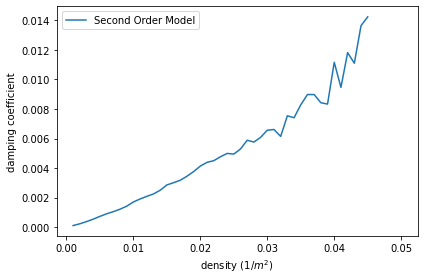

In [85]:
# plt.plot(Ts, gamma1s, label='First Order Model')
plt.plot(Ds, gamma2s, label='Second Order Model')
plt.legend()
plt.ylabel("damping coefficient")
plt.xlabel(r'density $(1/m^2)$')
plt.tight_layout()
plt.savefig("damping coefficient_density.jpg")

No handles with labels found to put in legend.


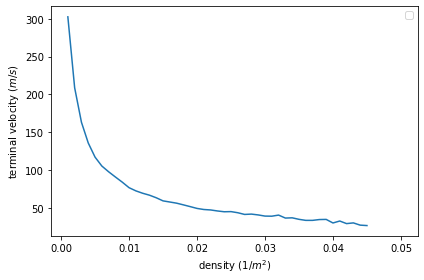

In [86]:
# plt.plot(Ts, gamma1s, label='First Order Model')
plt.plot(Ds, terminal_vs)
plt.legend()
plt.ylabel(r'terminal velocity $(m/s)$')
plt.xlabel(r'density $(1/m^2)$')
plt.tight_layout()
plt.savefig("terminal_velocity_density.jpg")

## Mass Ratios

In [87]:
gamma1s = [] 
gamma2s = []
terminal_vs = []

MRs = list(map(lambda x : x,  range( 1, 100)))
for MR in MRs :
    print(MR)
    [g1, g2, terminal_v] = compare_models('result_MR', 'MR', MR)
    print(g1)
    print(g2)
    gamma1s.append(g1)
    gamma2s.append(g2)
    terminal_vs.append(terminal_v)

# plt.plot(MRs, gamma1s, label='First Order Model')
# plt.plot(MRs, gamma2s, label='Second Order Model')
# plt.legend()
# plt.ylabel("damping coefficient")
# plt.xlabel("Mass Ratio")

1
damping factor gamma in the first order situation : 0.543246340308182
damping factor gamma in the second order situation : 0.029511658625823306
The Mean Square Root Error of First Order Model : 31.63649788970746
The Mean Square Root Error of Second Order Model : 31.63606870178955
The second order model is more fitter than the first order model
0.543246340308182
0.029511658625823306
2
damping factor gamma in the first order situation : 0.3480873472693488
damping factor gamma in the second order situation : 0.012116480132901225
The Mean Square Root Error of First Order Model : 25.28604716402682
The Mean Square Root Error of Second Order Model : 25.282314680217674
The second order model is more fitter than the first order model
0.3480873472693488
0.012116480132901225
3
damping factor gamma in the first order situation : 0.25448798757124874
damping factor gamma in the second order situation : 0.006476413581806407
The Mean Square Root Error of First Order Model : 22.62207227564148
The Mea

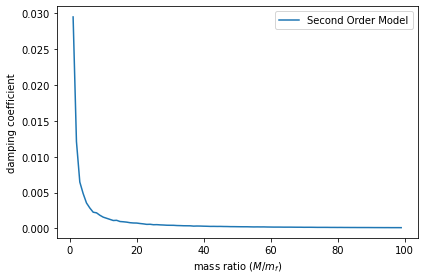

In [88]:
# plt.plot(Ts, gamma1s, label='First Order Model')
plt.plot(MRs, gamma2s, label='Second Order Model')
plt.legend()
plt.ylabel("damping coefficient")
plt.xlabel(r'mass ratio $(M/m_f)$')
plt.tight_layout()
plt.savefig("damping coefficient_mass.jpg")

No handles with labels found to put in legend.


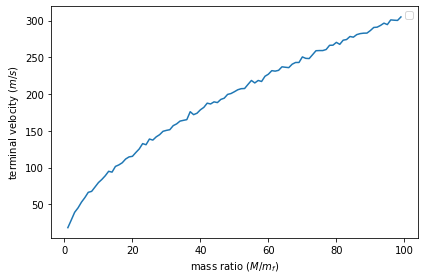

In [89]:
# plt.plot(Ts, gamma1s, label='First Order Model')
plt.plot(MRs, terminal_vs)
plt.legend()
plt.ylabel(r'terminal velocity $(m/s)$')
plt.xlabel(r'mass ratio $(M/m_f)$')
plt.tight_layout()
plt.savefig("terminal_velocity_mass.jpg")